In [ ]:
from modulos import eda
import xarray as xr
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
ds = xr.open_dataset('El Nino - indices/sst.nino3.index.nc')
ds

<xarray.Dataset> Size: 158kB
Dimensions:  (time: 13149, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 105kB 1985-01-01 1985-01-02 ... 2020-12-31
  * lon      (lon) float64 8B 0.0
  * lat      (lat) float64 8B 0.0
Data variables:
    sst      (time, lat, lon) float32 53kB ...
Attributes:
    CDI:            Climate Data Interface version 2.4.0 (https://mpimet.mpg....
    Conventions:    CF-1.5
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    institution:    NOAA/NCDC
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    history:        Mon Jul 21 15:06:38 2025: cdo fldmean sst.nino3.anom.nc s...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 2.4.0 (https://mpimet.mpg....

In [3]:
df = ds.to_dataframe().reset_index()
df

,time,lat,lon,sst
0,1985-01-01,0.0,0.0,-1.130554
1,1985-01-02,0.0,0.0,-1.118706
2,1985-01-03,0.0,0.0,-1.004945
3,1985-01-04,0.0,0.0,-0.933291
4,1985-01-05,0.0,0.0,-0.936055
...,...,...,...,...
13144,2020-12-27,0.0,0.0,-0.695351
13145,2020-12-28,0.0,0.0,-0.639939
13146,2020-12-29,0.0,0.0,-0.601540
13147,2020-12-30,0.0,0.0,-0.576097


In [4]:
df = df.drop(columns=['lat', 'lon'])
df

,time,sst
0,1985-01-01,-1.130554
1,1985-01-02,-1.118706
2,1985-01-03,-1.004945
3,1985-01-04,-0.933291
4,1985-01-05,-0.936055
...,...,...
13144,2020-12-27,-0.695351
13145,2020-12-28,-0.639939
13146,2020-12-29,-0.601540
13147,2020-12-30,-0.576097


In [5]:
df.index = df['time']
df.drop(columns=['time'], inplace=True)
df

,sst
time,
1985-01-01,-1.130554
1985-01-02,-1.118706
1985-01-03,-1.004945
1985-01-04,-0.933291
1985-01-05,-0.936055
...,...
2020-12-27,-0.695351
2020-12-28,-0.639939
2020-12-29,-0.601540


In [6]:
dados = eda.data_processing('Cotas extraidas', '1985-01-01', '2020-12-31', ['dados_diarios_estacao_14990000.csv'])
dados

,14990000
Data,
1985-01-01,2169.0
1985-01-02,2178.0
1985-01-03,2186.0
1985-01-04,2194.0
1985-01-05,2201.0
...,...
2020-12-27,2062.0
2020-12-28,2072.0
2020-12-29,2080.0


In [7]:
dados['El Nino 3'] = df['sst']
dados

,14990000,El Nino 3
Data,,
1985-01-01,2169.0,-1.130554
1985-01-02,2178.0,-1.118706
1985-01-03,2186.0,-1.004945
1985-01-04,2194.0,-0.933291
1985-01-05,2201.0,-0.936055
...,...,...
2020-12-27,2062.0,-0.695351
2020-12-28,2072.0,-0.639939
2020-12-29,2080.0,-0.601540


<Axes: xlabel='time'>

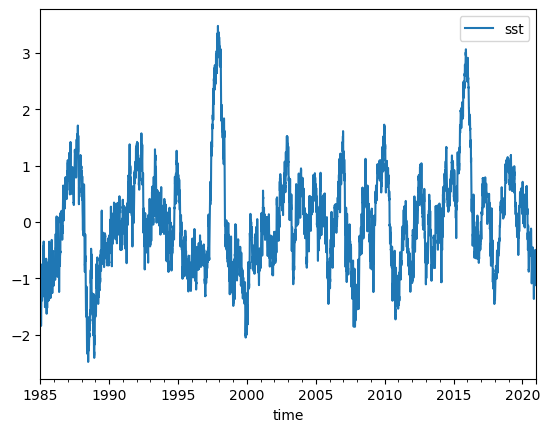

In [8]:
df.plot()

In [21]:
tgt = '14990000'

decomp = seasonal_decompose(dados['14990000'], model='additive', period=365)
deseason = dados[tgt] - decomp.seasonal

best_lag = None
d_best_lag = None
min_corr = np.inf
d_min_corr = np.inf

for i in range(0, 300):
    corr = dados[tgt].corr(dados['El Nino 3'].shift(i), method='spearman')
    d_corr = deseason.corr(dados['El Nino 3'].shift(i), method='spearman')

    if corr < min_corr:
        min_corr = corr
        best_lag = i
    
    if d_corr < d_min_corr:
        d_min_corr = d_corr
        d_best_lag = i
        
print(f"Melhor lag = {best_lag}; Correlação = {min_corr:.4f}")
print(f"D Melhor lag = {d_best_lag}; Correlação = {d_min_corr:.4f}")

Melhor lag = 178; Correlação = -0.1511
D Melhor lag = 178; Correlação = -0.2852


In [11]:
ds2 = xr.open_dataset('El Nino - indices/sst.nino34.index.nc')
ds2

<xarray.Dataset> Size: 158kB
Dimensions:  (time: 13149, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 105kB 1985-01-01 1985-01-02 ... 2020-12-31
  * lon      (lon) float64 8B 0.0
  * lat      (lat) float64 8B 0.0
Data variables:
    sst      (time, lat, lon) float32 53kB ...
Attributes:
    CDI:            Climate Data Interface version 2.4.0 (https://mpimet.mpg....
    Conventions:    CF-1.5
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    institution:    NOAA/NCDC
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    history:        Mon Jul 21 15:06:19 2025: cdo fldmean sst.nino34.anom.nc ...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 2.4.0 (https://mpimet.mpg....

In [12]:
df2 = ds2.to_dataframe().reset_index()
df2

,time,lat,lon,sst
0,1985-01-01,0.0,0.0,-1.003260
1,1985-01-02,0.0,0.0,-0.972396
2,1985-01-03,0.0,0.0,-0.960776
3,1985-01-04,0.0,0.0,-0.977119
4,1985-01-05,0.0,0.0,-1.000219
...,...,...,...,...
13144,2020-12-27,0.0,0.0,-0.900767
13145,2020-12-28,0.0,0.0,-0.881045
13146,2020-12-29,0.0,0.0,-0.874717
13147,2020-12-30,0.0,0.0,-0.913502


In [13]:
df2 = df2.drop(columns=['lat', 'lon'])
df2.index = df2['time']
df2.drop(columns=['time'], inplace=True)
df2

,sst
time,
1985-01-01,-1.003260
1985-01-02,-0.972396
1985-01-03,-0.960776
1985-01-04,-0.977119
1985-01-05,-1.000219
...,...
2020-12-27,-0.900767
2020-12-28,-0.881045
2020-12-29,-0.874717


<Axes: xlabel='time'>

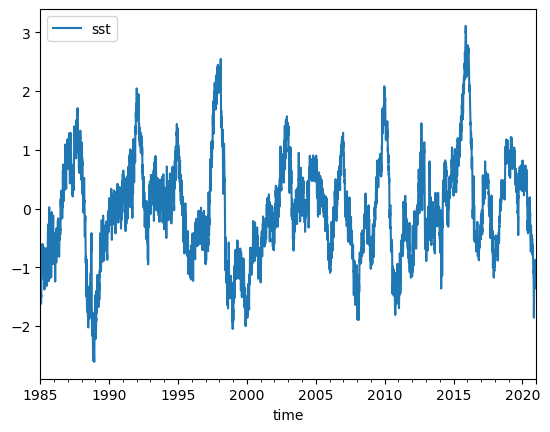

In [23]:
df2.plot()

In [14]:
dados['El Nino 3.4'] = df2['sst']
dados

,14990000,El Nino 3,El Nino 3.4
Data,,,
1985-01-01,2169.0,-1.130554,-1.003260
1985-01-02,2178.0,-1.118706,-0.972396
1985-01-03,2186.0,-1.004945,-0.960776
1985-01-04,2194.0,-0.933291,-0.977119
1985-01-05,2201.0,-0.936055,-1.000219
...,...,...,...
2020-12-27,2062.0,-0.695351,-0.900767
2020-12-28,2072.0,-0.639939,-0.881045
2020-12-29,2080.0,-0.601540,-0.874717


In [22]:
tgt = '14990000'

decomp = seasonal_decompose(dados['14990000'], model='additive', period=365)
deseason = dados[tgt] - decomp.seasonal

best_lag = None
d_best_lag = None
min_corr = np.inf
d_min_corr = np.inf

for i in range(0, 300):
    corr = dados[tgt].corr(dados['El Nino 3.4'].shift(i), method='spearman')
    d_corr = deseason.corr(dados['El Nino 3.4'].shift(i), method='spearman')

    if corr < min_corr:
        min_corr = corr
        best_lag = i

    if d_corr < d_min_corr:
        d_min_corr = d_corr
        d_best_lag = i
        
print(f"Melhor lag = {best_lag}; Correlação = {min_corr:.4f}")
print(f"D Melhor lag = {d_best_lag}; Correlação = {d_min_corr:.4f}")

Melhor lag = 176; Correlação = -0.1493
D Melhor lag = 190; Correlação = -0.3257


In [24]:
df.to_csv('El Nino - indices/sst_nino3.csv', sep=';')
df2.to_csv('El Nino - indices/sst_nino34.csv', sep=';')